In [4]:
import string
from collections import Counter

import matplotlib.pyplot as plt

In [9]:
!pip install GetOldTweets3


In [38]:
def get_tweets():
    import GetOldTweets3 as got #Library used to scrape data from Twitter without any other tools
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch('#tiktokban') \
        .setSince("2020-06-20") \
        .setUntil("2020-06-30") \
        .setMaxTweets(100)
    #Creation of liist which contains all the tweets
    tweets=got.manager.TweetManager.getTweets(tweetCriteria)
    #Creating list of chosen data
    text_tweets=[[tweet.text]for tweet in tweets]
    return text_tweets
    
    

In [39]:
#reading text file
text=""
text_tweets=get_tweets()

length=len(text_tweets)
for i in range(0, length):
    text=text_tweets[i][0]+ " " + text
    
#converting to lower_case
lower_case=text.lower()

#removing punctuations
cleaned_text=lower_case.translate(str.maketrans('','',string.punctuation))

#splitting text into words
tokenized_words=cleaned_text.split()

In [40]:
#print texts
text_tweets

[['भारत की डिजिटल सिक्योरिटी इस कदम से मजबूत होगी और चीनी हैकर्स को इससे बड़ी चोट होगी #59ChineseApps #TikTok #tiktokbanindia #tiktokban #ChineseProductsInDustbin'],
 ["PC Gamers Assemble! @IntelIndia &amp; @Dell_IN have chance for you to grab a key to the closed PC beta weekend for Marvel's Avengers!"],
 ['#regalo #barcelona #Maroc #Travel #trip #lovelyday #tiktokteens #tiktokers #tiktoktweets #TikTokgirl #tiktokban #Spain #cute #Marrakech #LoveFromCanada #Barcellona #Madrid #Dubai #Marruecos'],
 ['Tiktok - one most used app in India got banned by Indian government! Now people started to hunt for a app which is similar to tiktok... We got so many tiktok stars once after it launched! Hope! We will find better one soon... #tiktokban #India #tiktokstars'],
 ['Síguenos para mas contenido de: #tiktokers #tiktokteens #tiktokban '],
 ["BREAKING GODDAMN NEWS: I'M SLIGHTLY FUCKING RICHER, PAL! HAHAHAHAAAAAA! #headshot #tiktokban"],
 ['#tiktokbanindia lo ho he gaya... #tiktokban #Chineseapps #5

In [41]:
from nltk.corpus import stopwords
stop_words=stopwords

In [42]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [43]:
final_words=[word for word in tokenized_words if word not in stop_words]

In [44]:
emotion_list=[]
with open('D:/New Folder (2)/emotions.txt','r')as file:
    for line in file:
        clear_line=line.replace('\n','').replace(',','').replace("'",'').strip()
        word, emotion=clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)
            
            
w=Counter(emotion_list)
print(w)

Counter({' happy': 2, ' sad': 1, ' free': 1, ' lost': 1, ' singled out': 1, ' surprise': 1, ' codependent': 1, ' alone': 1})


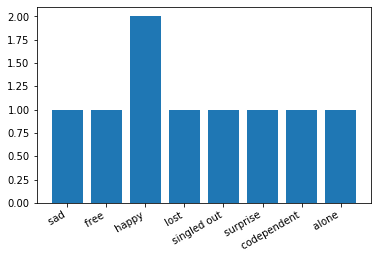

In [45]:
fig, ax1=plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()